In [138]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [139]:
train_df = pd.read_csv(r'C:\Users\Qihong\Box\1_Kaggle\Store_sales\train.csv',index_col='id')
test_df = pd.read_csv(r'C:\Users\Qihong\Box\1_Kaggle\Store_sales\test.csv',index_col='id')

C:\Users\Qihong\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# Explanatory Data Analysis

In [140]:
train_df

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148


In [141]:
#change date datatype as datetime
train_df.date = pd.to_datetime(train_df.date)
test_df.date= pd.to_datetime(test_df.date)

train_df['year'] = train_df.date.dt.year
test_df['year'] = test_df.date.dt.year

train_df['month'] = train_df.date.dt.month
test_df['month'] = test_df.date.dt.month

train_df['dayofmonth'] = train_df.date.dt.day
test_df['dayofmonth'] = test_df.date.dt.day

train_df['dayofweek'] = train_df.date.dt.dayofweek
test_df['dayofweek'] = test_df.date.dt.dayofweek

train_df['dayname'] = train_df.date.dt.strftime('%A')
test_df['dayname'] = test_df.date.dt.strftime('%A')

In [142]:
train_df.head()

,date,store_nbr,family,sales,onpromotion,year,month,dayofmonth,dayofweek,dayname
id,,,,,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,Tuesday
1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,Tuesday
2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,Tuesday
3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,Tuesday
4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,Tuesday


<font size=4>In this competition, need to predict the sales of stores the last two weeks of August 2017. <font>

In [143]:
print('Train: ',min(train_df.date),max(train_df.date))
print('\n')
print('Test: ',min(test_df.date),max(test_df.date))

Train:  2013-01-01 00:00:00 2017-08-15 00:00:00


Test:  2017-08-16 00:00:00 2017-08-31 00:00:00


In [145]:
#store number from 1 -54
sorted(list(train_df.store_nbr.unique()))


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54]

<font size=4>Onpromotion gives the total number of items in a product family that were being promoted at a store at a given date. <font>

In [146]:
train_df.onpromotion.unique()

array([  0,   3,   5,   1,  56,  20,  19,   2,   4,  18,  17,  12,   6,
         7,  10,   9,  50,   8,  16,  42,  51,  13,  15,  47,  21,  40,
        37,  54,  24,  58,  22,  59,  11,  45,  25,  55,  26,  43,  35,
        14,  28,  46,  36,  32,  53,  57,  27,  39,  41,  30,  29,  49,
        23,  48,  44,  38,  31,  52,  33,  34,  61,  60, 116,  86,  73,
       113, 102,  68, 104,  93,  70,  92, 121,  72, 178, 174, 161, 118,
       105, 172, 163, 167, 142, 154, 133, 180, 181, 173, 165, 168, 186,
       140, 149, 145, 169, 188,  62,  84, 111,  65, 107,  63, 101,  87,
       125,  94, 114, 171, 153, 170, 166, 141, 155, 179, 192, 131, 147,
       151, 189,  79,  74, 110,  64,  67,  99, 123, 157, 117, 150, 182,
       162, 160, 194, 135, 190,  69, 108,  89, 126, 156, 103, 146, 132,
       177, 164, 176, 112,  75, 109,  91, 128, 175, 187, 148, 137, 184,
       196, 144, 158, 119, 106,  66, 100,  90, 120, 115,  98, 159, 152,
       185, 139, 143,  80, 124,  71, 134, 193,  78,  88, 122, 13

t

In [147]:
train_df.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

# Yearly Growth  by Product Family
* <font size=4> Almost all product families were growing stably to 2017.</font>

* <font size=4> There are some exceptions for the tendency. Frozen foods,baby care, and liquor,beer, wine sales decreased from 2016. They might get affected by the Earthquake in Equador on April 16, 2016.</font>

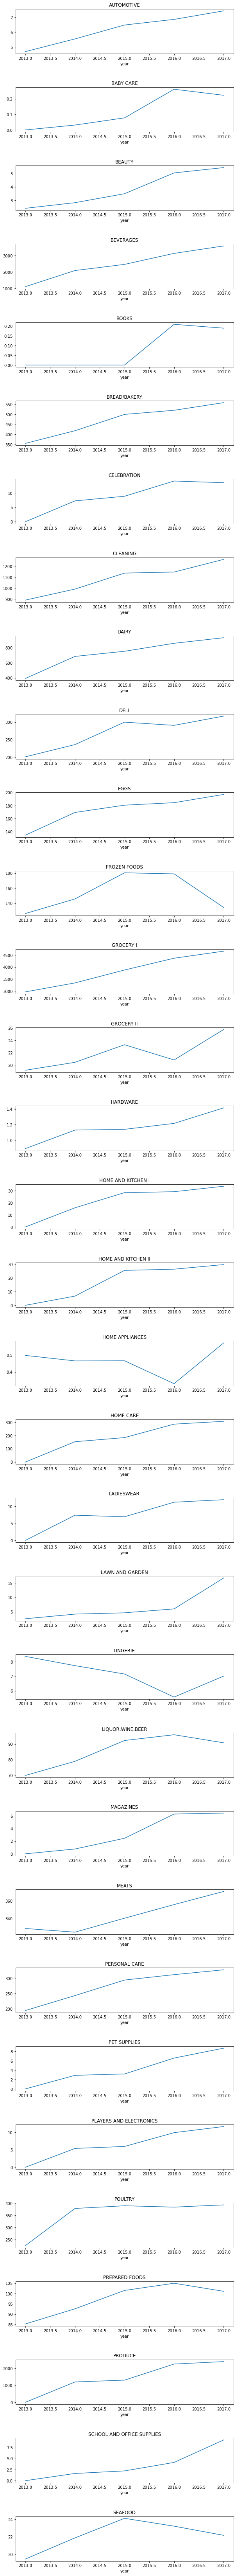

In [148]:
fig= plt.figure(figsize=(10,120))
fig.subplots_adjust(hspace=0.75)
for i,product in enumerate(train_df.family.unique()):
    ax = fig.add_subplot(33,1,i+1)
    train_df.query('family==@product').groupby(['year']).sales.mean().plot()
    plt.title(product);



# Monthly Sales by Year
* <font size=4> It is hard to see some seasonal effects from the graphs except for some items of the christmas season.Frozen foods are obviously affected by the Christmas season.</font>

* <font size=4> Books sold well in 2016 from septemper to the end of the year. </font>


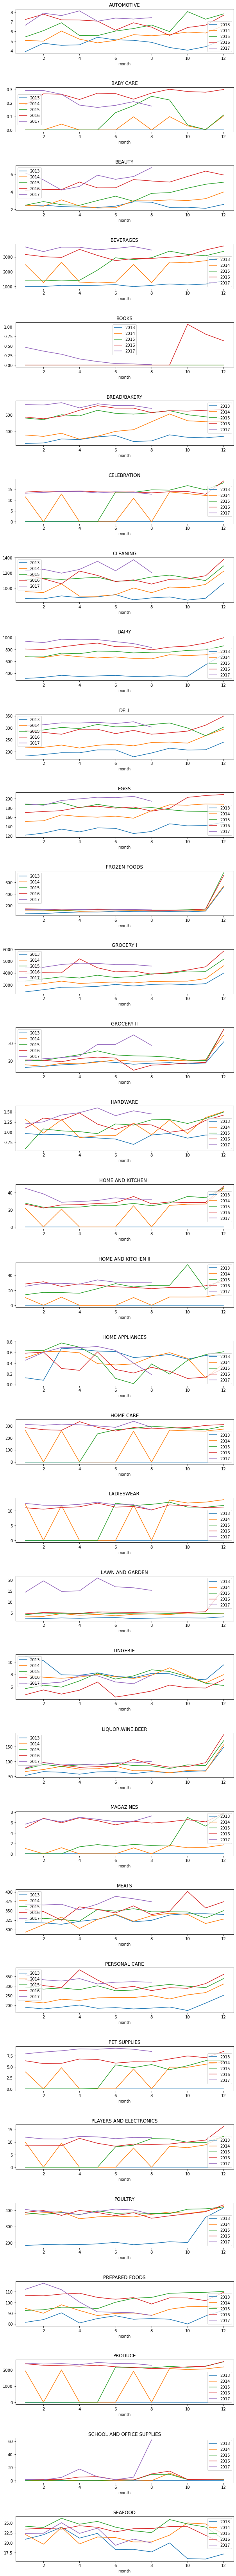

In [149]:
fig= plt.figure(figsize=(10,120))
fig.subplots_adjust(hspace=0.75)
for i,product in enumerate(train_df.family.unique()):
    ax = fig.add_subplot(33,1,i+1)
    select = train_df.query('family==@product')
    for year in [2013,2014,2015,2016,2017]: 
        select.query('year==@year').groupby('month').sales.mean().plot(ax=ax,label=year)
    plt.title(product)
    ax.legend();

********************************************************************
<font size=4> No missing values in the dataset. </font>

In [150]:
print(train_df.isna().sum())
print(test_df.isna().sum())

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
year           0
month          0
dayofmonth     0
dayofweek      0
dayname        0
dtype: int64
date           0
store_nbr      0
family         0
onpromotion    0
year           0
month          0
dayofmonth     0
dayofweek      0
dayname        0
dtype: int64


# Puplic sector's Paid Day affects the sales?

* <font size=4> "Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this" from the additional notes on data page.</font>

* <font size=4> Not so obvious but theare are two sales peaks around the paydays. </font>

Text(0.5, 1.0, 'Sales Average by Day of Month')

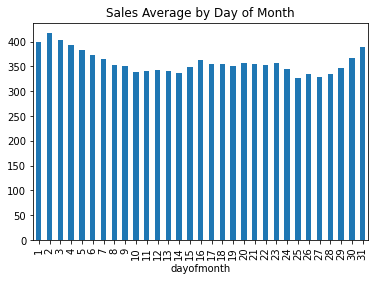

In [151]:
train_df.groupby('dayofmonth').sales.mean().plot(kind='bar')
plt.title('Sales Average by Day of Month')

<font size=4>More people go to grocery on weekends.</font>

Text(0.5, 1.0, 'Average Sales by Day of week')

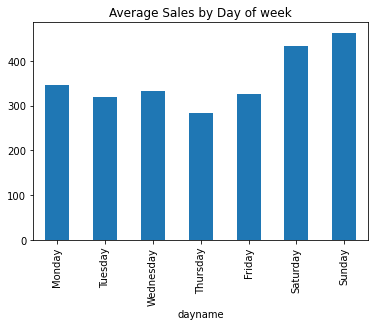

In [152]:
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
train_df.groupby('dayname').sales.mean().reindex(index=order).plot(kind='bar')
plt.title('Average Sales by Day of week')

# Sales Ranking

<font size=4> Sales is depending on the location,store size, promotions, and so on. We can check those factors later with the data from the other file.

Text(0.5, 1.0, 'Sales Ranking by Store')

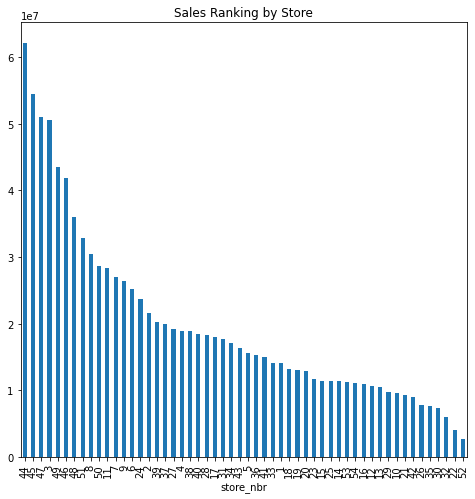

In [153]:
plt.figure(figsize=(8,8))
train_df.groupby('store_nbr').sales.sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Sales Ranking by Store')


Text(0.5, 1.0, 'Promotion Items Ranking by Store')

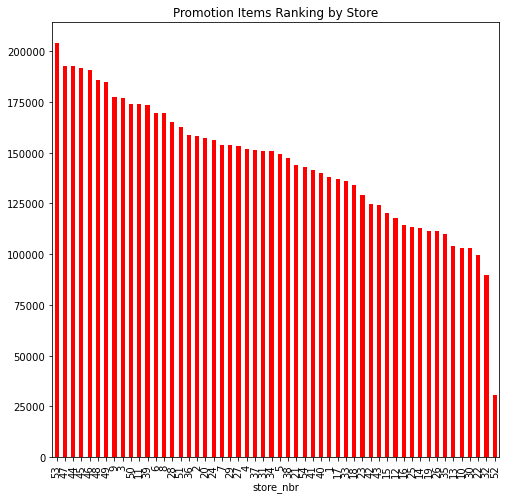

In [154]:
plt.figure(figsize=(8,8))
train_df.groupby('store_nbr').onpromotion.sum().sort_values(ascending=False).plot(kind='bar',color='red')
plt.title('Promotion Items Ranking by Store')

* <font size=4> Promotion and sales have positive corellation as the graph shows. Store number 53 has many promotions but does not have much sales.</font>

Text(0.5, 1.0, 'Promotion and Sales Relationship')

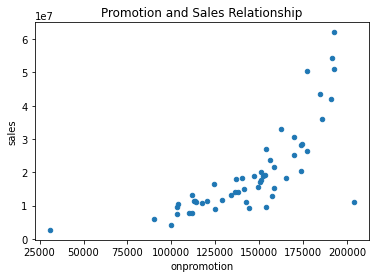

In [155]:
train_df.groupby('store_nbr')[['onpromotion','sales']].sum().plot.scatter('onpromotion','sales')
plt.title('Promotion and Sales Relationship')

# Oil CSV

* <font size=4>According to the additional notes on the data page, Equador is a n oil-dependent country. Oil price is econimical health. There might be two oil shocks from 2014 to 2016</font>

* <font size=4>Adding GDP data will help predictions.</font>

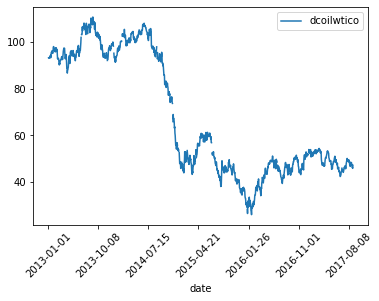

In [156]:
oil = pd.read_csv(r'C:\Users\Qihong\Box\1_Kaggle\Store_sales\oil.csv',index_col='date')
oil.plot();
plt.xticks(rotation=45);

In [157]:
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [158]:
# NA rows
oil.isna().sum()

dcoilwtico    43
dtype: int64

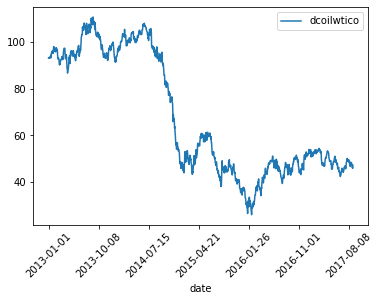

In [159]:
#filling missing data
oil = oil.interpolate(method='linear')
#the first row is still missing the value
oil.iloc[0] = oil.iloc[1]
oil.plot();
plt.xticks(rotation=45);

In [160]:
import datetime

#some days are skipped. Filling up the gap.

start_date = train_df.date.min() 
# from beggining of the train date and the end of test date
number_of_days = 1704 #1703
date_list = [(start_date + datetime.timedelta(days = day)).isoformat() for day in range(number_of_days)]

date = (pd.Series(date_list)).to_frame()
date.columns = ['date']
date.date = pd.to_datetime(date.date)
date['date_str'] = date.date.astype(str)
oil['date_str'] = oil.index.astype(str)

oil = pd.merge(date,oil,how='left',on='date_str')



<AxesSubplot:xlabel='date'>

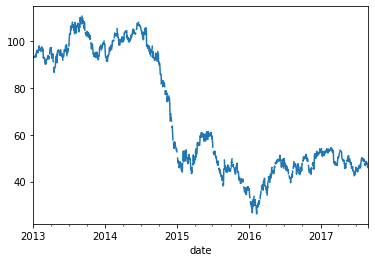

In [161]:
oil.set_index('date').dcoilwtico.plot()


In [162]:
oil = oil.set_index('date').dcoilwtico.interpolate(method='linear').to_frame()
#oil.set_index('date').dcoilwtico.plot();



In [163]:
oil['date_str'] = oil.index.astype(str)


In [164]:
# add oil price to the train date
train_df['date_str'] = train_df.date.astype(str)

train_df = pd.merge(train_df,oil,how='left',on='date_str')
train_df.drop(columns='date_str',axis=1,inplace=True)


In [165]:
test_df['date_str'] = test_df.date.astype(str)
test_df = pd.merge(test_df,oil,how='left', on='date_str')

test_df.drop(columns='date_str',axis=1,inplace=True)

In [166]:
plt.figure(figsize=(10,10))
train_df.groupby('family')[['sales','dcoilwtico']].corr().iloc[0::2,-1].sort_values()


family                           
HOME CARE                   sales   -0.453710
MAGAZINES                   sales   -0.380593
HOME AND KITCHEN II         sales   -0.375661
PRODUCE                     sales   -0.340423
HOME AND KITCHEN I          sales   -0.328061
PLAYERS AND ELECTRONICS     sales   -0.327215
BEVERAGES                   sales   -0.318847
PET SUPPLIES                sales   -0.307063
CELEBRATION                 sales   -0.294697
LADIESWEAR                  sales   -0.255375
DAIRY                       sales   -0.220657
PERSONAL CARE               sales   -0.204594
BEAUTY                      sales   -0.203606
GROCERY I                   sales   -0.195793
DELI                        sales   -0.190362
BREAD/BAKERY                sales   -0.177374
LAWN AND GARDEN             sales   -0.164715
CLEANING                    sales   -0.159257
AUTOMOTIVE                  sales   -0.145956
BABY CARE                   sales   -0.122380
POULTRY                     sales   -0.114485


<Figure size 720x720 with 0 Axes>

<font size =4> Some product family (Home Care,Magazines,Home and Kitchen II,Produce,Home and Kitchen I)<br>
    have slightly stronger correlationship with the oil price.
    </font>

# Stores CSV

In [167]:
stores = pd.read_csv(r'C:\Users\Qihong\Box\1_Kaggle\Store_sales\stores.csv',index_col='store_nbr')
train_df = pd.merge(train_df,stores,how='left',on='store_nbr')
test_df = pd.merge(test_df,stores,how='left',on='store_nbr')

<font size=4> Type A looks like a biggest type of store and Type C is the smalles size of store.
    </font>

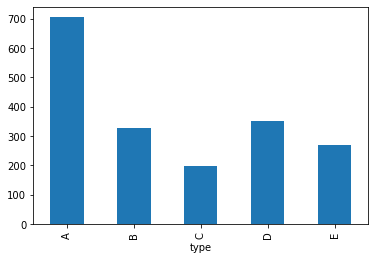

In [168]:
train_df.groupby(['type']).sales.mean().plot(kind='bar');

<font size = 4> There will be positive corellation with the number of stores and the city population. Guayaquil is the most populous city in 2022, and Quito is the second most populous city.
    </font>

Text(0.5, 1.0, 'Number of Stores by City')

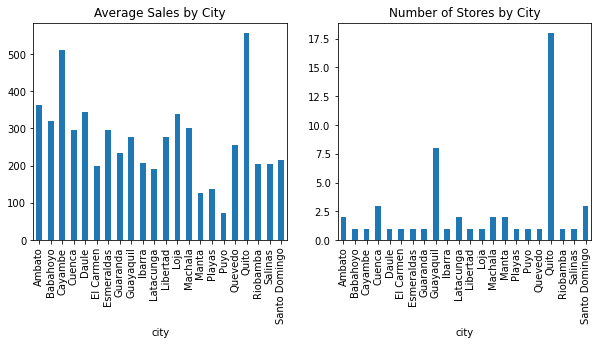

In [169]:
plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
train_df.groupby(['city']).sales.mean().plot(kind='bar')
plt.title('Average Sales by City')
ax2 = plt.subplot(1,2,2)
train_df.groupby(['city'])['store_nbr'].nunique().plot(kind='bar')
plt.title('Number of Stores by City')

<font size=4>According to the data description, the cluster is a grouping of similar stores. I cannot identify how the cluster and the type is different from the dataset.
</font>

<AxesSubplot:xlabel='cluster'>

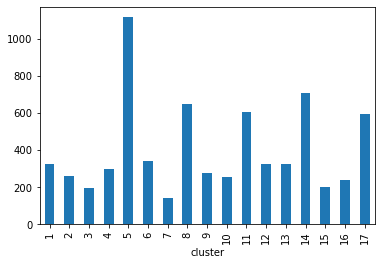

In [170]:
train_df.groupby(['cluster']).sales.mean().plot(kind='bar')

In [171]:
train_df.groupby(['cluster','store_nbr','city','type']).nunique()

date  family  sales  onpromotion  year  \
cluster store_nbr city          type                                           
1       24        Guayaquil     D     1684      33  15182          160     5   
        25        Salinas       D     1684      33  12023          149     5   
        27        Daule         D     1684      33  15260          159     5   
2       37        Cuenca        D     1684      33  15065          173     5   
        42        Cuenca        D     1684      33   7676          157     5   
3       16        Santo Domingo C     1684      33   7431          116     5   
        30        Guayaquil     C     1684      33   6665          108     5   
        32        Guayaquil     C     1684      33   6402           97     5   
        33        Quevedo       C     1684      33   8091          130     5   
        35        Playas        C     1684      33   6851          107     5   
        40        Machala       C     1684      33   8998          127     5   
        54        El Carmen     C     1684      33   7546          180     5   
4       5         Santo Domingo D     1684      33  14753          165     5   
        38        Loja          D     1684      33  15025          169     5   
        41        Machala       D     1684      33  14040          165     5   
5       44        Quito         A     1684      33  18368          199     5   
6       9         Quito         B     1684      33  13939          155     5   
        11        Cayambe       B     1684      33  12111          152     5   
        20        Quito         B     1684      33   8613          154     5   
        21        Santo Domingo B     1684      33   6698          147     5   
        34        Guayaquil     B     1684      33  11151          139     5   
        39        Cuenca        B     1684      33  13105          170     5   
7       14        Riobamba      C     1684      33   7562          115     5   
        22        Puyo          C     1684      33   3970          114     5   
8       3         Quito         D     1684      33  17801          193     5   
        7         Quito         D     1684      33  15462          180     5   
        8         Quito         D     1684      33  16181          179     5   
9       4         Quito         D     1684      33  15031          168     5   
        23        Ambato        D     1684      33  13308          159     5   
10      26        Guayaquil     D     1684      33  10077          126     5   
        28        Guayaquil     E     1684      33  12604          148     5   
        29        Guayaquil     E     1684      33   7463          155     5   
        31        Babahoyo      B     1684      33  11503          140     5   
        36        Libertad      E     1684      33  11242          153     5   
        43        Esmeraldas    E     1684      33   9372          135     5   
11      45        Quito         A     1684      33  18217          199     5   
        49        Quito         A     1684      33  17364          194     5   
        52        Manta         A     1684      33   1681          103     5   
12      17        Quito         C     1684      33   8313          137     5   
13      1         Quito         D     1684      33  13668          155     5   
        2         Quito         D     1684      33  14579          174     5   
        6         Quito         D     1684      33  15947          177     5   
        53        Manta         D     1684      33  10030          239     5   
14      46        Quito         A     1684      33  17221          189     5   
        47        Quito         A     1684      33  18004          200     5   
        48        Quito         A     1684      33  16930          191     5   
        50        Ambato        A     1684      33  16358          183     5   
15      10        Quito         C     1684      33   7330          108     5   
        12        Latacunga     C     

# Holidays_Events.CSV

In [172]:
holiday_df = pd.read_csv(r'C:\Users\Qihong\Box\1_Kaggle\Store_sales\holidays_events.csv')
holiday_df.query('transferred==True')

# transferred day is not celebrated
holiday_df = holiday_df.query('transferred ==False')
holiday_df.description = holiday_df.description.str.replace('Traslado ','')

#national
national = holiday_df.query('locale=="National"')

day_off = national.query('type!="Work Day" or type!="Event"').set_index('date')['description'].to_dict()

train_df['date_str'] = train_df.date.astype(str)
test_df['date_str'] = test_df.date.astype(str)

train_df['national_holiday'] = [1 if a in day_off else 0 for a in train_df.date_str]
test_df['national_holiday'] = [1 if a in day_off else 0 for a in test_df.date_str]

event = national.query('type=="Event"').set_index('date')['description'].to_dict()

train_df['national_event'] =[1 if a in event else 0 for a in train_df.date_str]
test_df['national_event'] =[1 if a in event else 0 for a in test_df.date_str]

work_day = national.query('type=="Work Day"').set_index('date')['description'].to_dict()
train_df['national_workday'] = [1 if a in work_day else 0 for a in train_df.date_str]
test_df['national_workday'] = [1 if a in work_day else 0 for a in test_df.date_str]

#weekend
train_df['weekend'] = [1 if a>=5 else 0 for a in train_df.dayofweek]
test_df['weekend'] = [1 if a>=5 else 0 for a in test_df.dayofweek]

In [173]:
train_df.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year', 'month',
       'dayofmonth', 'dayofweek', 'dayname', 'dcoilwtico', 'city', 'state',
       'type', 'cluster', 'date_str', 'national_holiday', 'national_event',
       'national_workday', 'weekend'],
      dtype='object')

In [174]:
#locale
#locale is corresponding to city of train_df
local = holiday_df.query('locale=="Local"')
local_dic = local.set_index('date').locale_name.to_dict()
train_df['local_holiday']=[1 if b in local_dic and local_dic[b]== a else 0 for a,b in zip(train_df.city,train_df.date_str)]
test_df['local_holiday']=[1 if b in local_dic and local_dic[b]== a else 0 for a,b in zip(test_df.city,test_df.date_str)]

In [175]:
#Regional
#Regional is corresonding to state of train_df
regional = holiday_df.query('locale=="Regional"')
regional_dic = regional.set_index('date').locale_name.to_dict()
train_df['regional_holiday']= [1 if b in regional_dic and regional_dic[b]== a else 0 for a,b in zip(train_df.state,train_df.date_str)]
test_df['regional_holiday']= [1 if b in regional_dic and regional_dic[b]== a else 0 for a,b in zip(test_df.state,test_df.date_str)]



# Transaction.CSV 

In [176]:
transaction_df = pd.read_csv(r'C:\Users\Qihong\Box\1_Kaggle\Store_sales\transactions.csv')

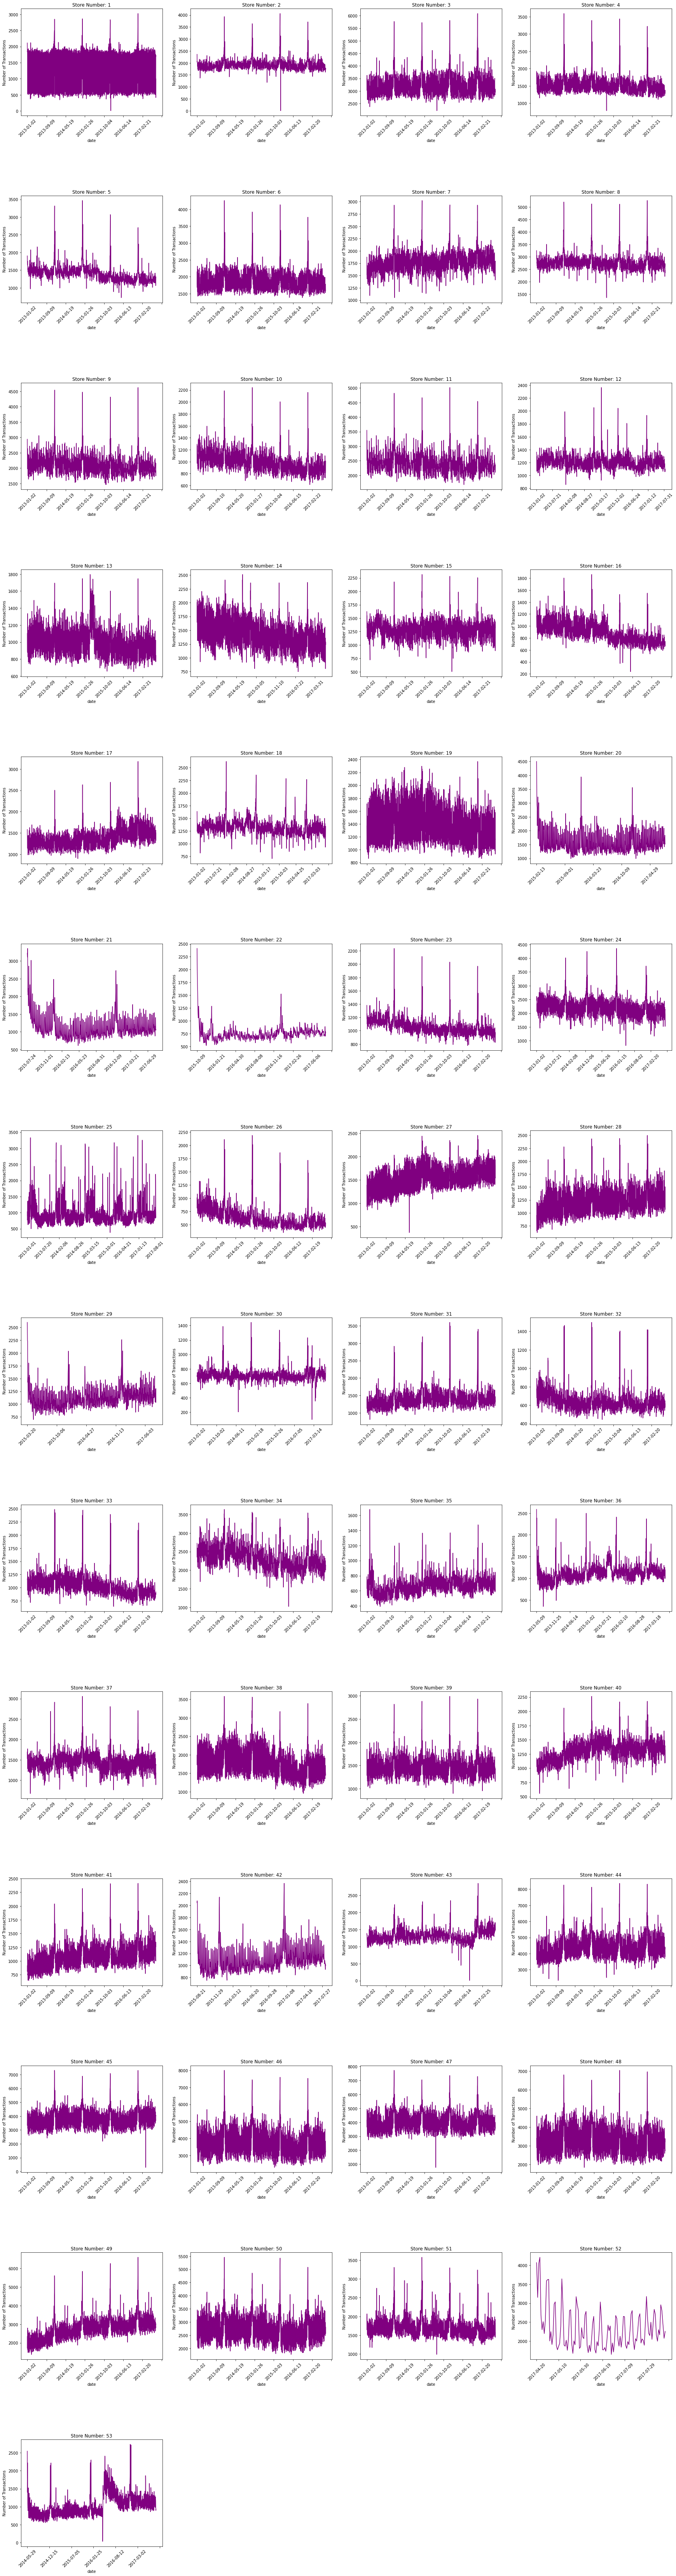

In [177]:
fig= plt.figure(figsize=(30,120))
fig.subplots_adjust(hspace=0.75)
for i,store in enumerate(range(1,54)):
    ax = fig.add_subplot(14,4,i+1)
    transaction_df.set_index('date').query('store_nbr==@store').transactions.plot(c='purple');
    plt.title('Store Number: ' + str(store));
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45);

<fond size=4>
    Every store have peak days in Christmas season. Some stores show upper trends.

# Preparing Data

In [178]:
len(train_df.query('date_str=="2013-01-01"'))

1782

In [180]:
#https://www.kaggle.com/c/store-sales-time-series-forecasting/discussion/291165
# idea and codes comes from this discussion 

train_df.sales = np.log1p(train_df.sales)


In [181]:
train_df = train_df.loc[~train_df.index.duplicated(keep='first')]
test_df = test_df.loc[~test_df.index.duplicated(keep='first')]

,date,store_nbr,family,onpromotion,year,month,dayofmonth,dayofweek,dayname,dcoilwtico,...,type,cluster,date_str,national_holiday,national_event,national_workday,weekend,local_holiday,regional_holiday,Istest
24007111,2017-08-16,1,AUTOMOTIVE,0,2017,8,16,2,Wednesday,46.80,...,D,13,2017-08-16,0,0,0,0,0,0,True
24007112,2017-08-16,1,BABY CARE,0,2017,8,16,2,Wednesday,46.80,...,D,13,2017-08-16,0,0,0,0,0,0,True
24007113,2017-08-16,1,BEAUTY,2,2017,8,16,2,Wednesday,46.80,...,D,13,2017-08-16,0,0,0,0,0,0,True
24007114,2017-08-16,1,BEVERAGES,20,2017,8,16,2,Wednesday,46.80,...,D,13,2017-08-16,0,0,0,0,0,0,True
24007115,2017-08-16,1,BOOKS,0,2017,8,16,2,Wednesday,46.80,...,D,13,2017-08-16,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24035618,2017-08-31,9,POULTRY,1,2017,8,31,3,Thursday,47.26,...,B,6,2017-08-31,0,0,0,0,0,0,True
24035619,2017-08-31,9,PREPARED FOODS,0,2017,8,31,3,Thursday,47.26,...,B,6,2017-08-31,0,0,0,0,0,0,True
24035620,2017-08-31,9,PRODUCE,1,2017,8,31,3,Thursday,47.26,...,B,6,2017-08-31,0,0,0,0,0,0,True
24035621,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,2017,8,31,3,Thursday,47.26,...,B,6,2017-08-31,0,0,0,0,0,0,True


In [183]:
train_df['Istest'] = False
test_df['Istest'] = True


full = pd.concat([train_df,test_df], ignore_index=True)
full.head()

,date,store_nbr,family,sales,onpromotion,year,month,dayofmonth,dayofweek,dayname,...,type,cluster,date_str,national_holiday,national_event,national_workday,weekend,local_holiday,regional_holiday,Istest
0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,Tuesday,...,D,13,2013-01-01,1,0,0,0,0,0,False
1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,Tuesday,...,D,13,2013-01-01,1,0,0,0,0,0,False
2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,Tuesday,...,D,13,2013-01-01,1,0,0,0,0,0,False
3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,Tuesday,...,D,13,2013-01-01,1,0,0,0,0,0,False
4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,Tuesday,...,D,13,2013-01-01,1,0,0,0,0,0,False


In [184]:


#remove leap year day
full = full.query('date_str !="2016-02-29"')


full['Lag_16'] = full['sales'].shift(1782*16)
full['Lag_17'] = full['sales'].shift(1782*17)
full['Lag_18'] = full['sales'].shift(1782*18)
full['Lag_19'] = full['sales'].shift(1782*19)
full['Lag_20'] = full['sales'].shift(1782*20)
full["Lag_21"] = full['sales'].shift(1782*21)
full['Lag_22'] = full['sales'].shift(1782*22)
full['Lag_28'] = full['sales'].shift(1782*28)
full['Lag_31'] = full['sales'].shift(1782*31)

full['Lag_365'] = full['sales'].shift(1782*365)


train_df = full.query('Istest==False')
test_df = full.query('Istest ==True')


In [187]:
full.head(30)

,date,store_nbr,family,sales,onpromotion,year,month,dayofmonth,dayofweek,dayname,...,Lag_16,Lag_17,Lag_18,Lag_19,Lag_20,Lag_21,Lag_22,Lag_28,Lag_31,Lag_365
0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2013-01-01,1,BREAD/BAKERY,0.0,0,2013,1,1,1,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2013-01-01,1,CELEBRATION,0.0,0,2013,1,1,1,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2013-01-01,1,CLEANING,0.0,0,2013,1,1,1,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2013-01-01,1,DAIRY,0.0,0,2013,1,1,1,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2013-01-01,1,DELI,0.0,0,2013,1,1,1,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
train_df = train_df.dropna(subset=['Lag_365'],axis=0)

In [190]:
FEATURES = ['store_nbr','family','onpromotion', 'year', 'month',
       'dayofmonth', 'dayofweek','dcoilwtico', 'city', 'state',
       'type', 'cluster', 'national_holiday', 'national_event',
       'national_workday', 'weekend', 'local_holiday', 'regional_holiday','Lag_16','Lag_17','Lag_18','Lag_19','Lag_20','Lag_21','Lag_22','Lag_28','Lag_31','Lag_365']
TARGET =['sales']



In [191]:
from sklearn import preprocessing
categories = ['family','city','state','type']
for i in categories:
    encoder = preprocessing.LabelEncoder()
    train_df[i] = encoder.fit_transform(train_df[i])
    test_df[i] =  encoder.transform(test_df[i])

C:\Users\Qihong\AppData\Local\Temp/ipykernel_12308/931374174.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[i] =  encoder.transform(test_df[i])


In [192]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(train_df,train_df[TARGET],test_size=0.05,shuffle=False)

In [193]:
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_log_error

linear = LinearRegression()
model = linear.fit(X_train[FEATURES],y_train)


#plt.scatter(X_val.date,model.predict(X_val[FEATURES]))
#plt.xticks(rotation=45)

predictions= model.predict(X_val[FEATURES])
predictions = [a if a>0 else 0 for a in predictions]
print('MSLE: ' + str(mean_squared_log_error(y_val,predictions)))


MSLE: 0.015556279576340287


In [195]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=500)
xgb.fit(X_train[FEATURES], y_train,
        eval_set=[(X_train[FEATURES],y_train),(X_val[FEATURES], y_val)],
       verbose=False,early_stopping_rounds=10)

#plt.scatter(X_val.date,xgb.predict(X_val[FEATURES]))
#plt.xticks(rotation=45)

#predictions have negative. Changed negative values to 0.
predictions= xgb.predict(X_val[FEATURES])
predictions = [a if a>0 else 0 for a in predictions]
print('MSLE: ',mean_squared_log_error(y_val,predictions))

MSLE:  0.013428728403851894


In [197]:
def objective(trial,X,y, name='xgb'):
    params = param = {
        #'eval_metrics': 'rmse',
        'lambda': trial.suggest_loguniform(
            'lambda', 1e-3, 10.0
        ),
        'alpha': trial.suggest_loguniform(
            'alpha', 1e-3, 10.0
        ),
        'eta': trial.suggest_float('eta', 1e-5, 0.1),
        'colsample_bytree': trial.suggest_categorical(
            'colsample_bytree', [0.5,0.6,0.7,0.8,0.9,1.0]
        ),
        'subsample': trial.suggest_categorical( 
            'subsample', [0.6,0.7,0.8,1.0]
        ),
        'learning_rate': trial.suggest_categorical(
            'learning_rate', [0.009,0.01,0.012,0.016, 0.02]
        ),
        'n_estimators': trial.suggest_categorical(
            "n_estimators", [150, 200, 300,500,1000]
        ),
        'max_depth': trial.suggest_categorical(
            'max_depth', [4,5,7,9,11,13,17]
        ),
        'random_state': 42,
        'min_child_weight': trial.suggest_int(
            'min_child_weight', 1, 300
        ),
        'random_state':10
        }

    model =  XGBRegressor(**params)
    model.fit(X_train[FEATURES],y_train,eval_set=[(X_val[FEATURES],y_val)],early_stopping_rounds=50,verbose=False)

    predictions_train = [a if a>0 else 0 for a in model.predict(X_train[FEATURES])]
    predictions_val  = [a if a>0 else 0 for a in model.predict(X_val[FEATURES])]           
    
    train_score = np.round(mean_squared_log_error(y_train, predictions_train), 5)
    test_score = np.round(mean_squared_log_error(y_val, predictions_val), 5)
                  
    print(f'TRAIN MSLE : {train_score} || TEST MSLE : {test_score}')
                  
    return test_score

In [198]:
#%%time

#from functools import partial
#import optuna

#optimize = partial(objective,X=X_train,y=y_train)

#study_lgbm = optuna.create_study(direction ='minimize')
#study_lgbm.optimize(optimize,n_trials=50)

In [199]:
params = {'lambda': 6.105970537016599, 'alpha': 0.874716179324655, 'eta': 0.047228549789593455, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.012, 'n_estimators': 1000, 'max_depth': 17, 'min_child_weight': 155}

# Making a submission file

In [201]:
xgb = XGBRegressor(**params)
xgb.fit(train_df[FEATURES], train_df[TARGET],verbose=False)

predictions= xgb.predict(test_df[FEATURES])
predictions = [a if a>0 else 0 for a in predictions]

In [206]:
output = pd.read_csv(r'C:\Users\Qihong\Box\1_Kaggle\Store_sales\sample_submission.csv',index_col='id')
output['sales']= np.expm1(predictions)

In [212]:
output

,sales
id,
3000888,1.579704
3000889,0.010630
3000890,1.700720
3000891,7.872664
3000892,0.081992
...,...
3029395,5.780846
3029396,4.322594
3029397,6.836865


In [215]:
path=r'C:\Users\Qihong\Box\1_Kaggle\Store_sales'

In [220]:
output.to_csv(path+'/submssion_Qihong.csv')

# References
Referred how to make graphs: [Kaggle merchandise EDA with baseline linear model](https://www.kaggle.com/lucamassaron/kaggle-merchandise-eda-with-baseline-linear-model)

Time series course on Kaggle https://www.kaggle.com/learn/time-series



# To be continued.
<font size=4> I will work on modeling part more. </font>